In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings

In [2]:
df = pd.read_csv(r"C:\Users\kavya\Downloads\E_Commerce.csv")

In [3]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
df.info

<bound method DataFrame.info of           ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   

In [8]:
# --- Feature engineering & Preprocessing ---
# Separate features and target
X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

In [9]:
# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [10]:
print("\nNumerical features:", num_features)
print("Categorical features:", cat_features)



Numerical features: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
Categorical features: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


In [15]:


# Numeric transformer
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [17]:
# Create a helper function to train and evaluate
def train_and_evaluate(model, model_name):
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {model_name} ===")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.named_steps['classifier'].classes_)
    plt.figure()
    disp.plot()
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    return pipe, acc


=== Logistic Regression ===
Accuracy: 0.6559
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60       887
           1       0.73      0.67      0.70      1313

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.66      0.66      2200



<Figure size 640x480 with 0 Axes>

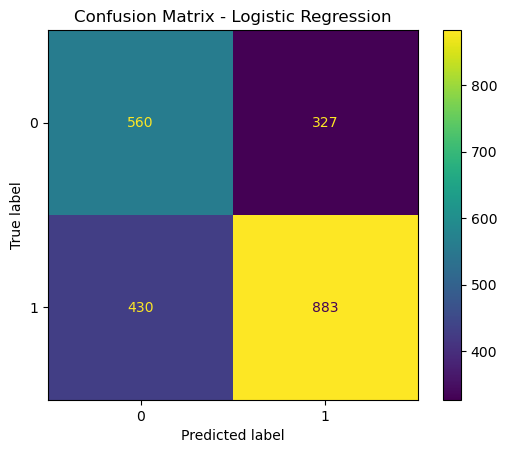


=== Decision Tree ===
Accuracy: 0.6436
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55       887
           1       0.70      0.71      0.71      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



<Figure size 640x480 with 0 Axes>

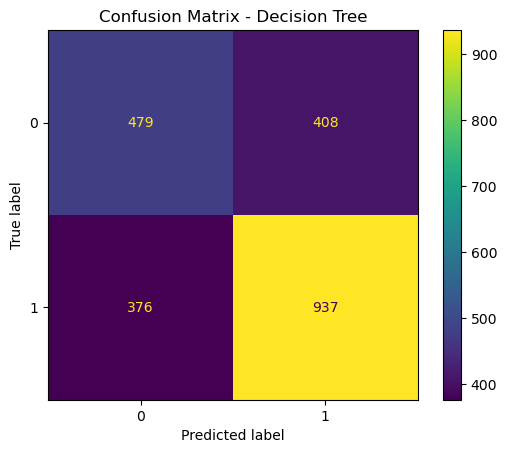


=== Random Forest ===
Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.77      0.65       887
           1       0.79      0.58      0.67      1313

    accuracy                           0.66      2200
   macro avg       0.67      0.68      0.66      2200
weighted avg       0.70      0.66      0.66      2200



<Figure size 640x480 with 0 Axes>

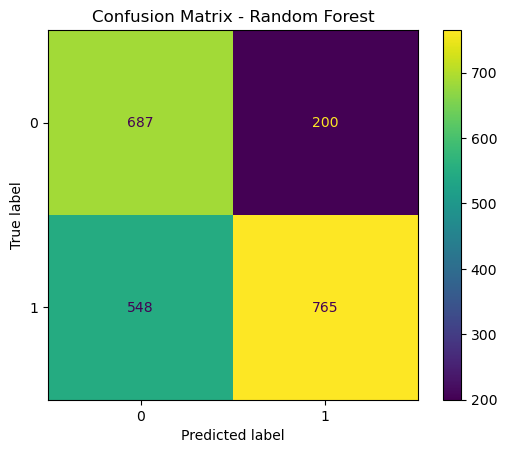


=== KNN ===
Accuracy: 0.6418
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.61      0.58       887
           1       0.71      0.67      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.64      0.64      2200



<Figure size 640x480 with 0 Axes>

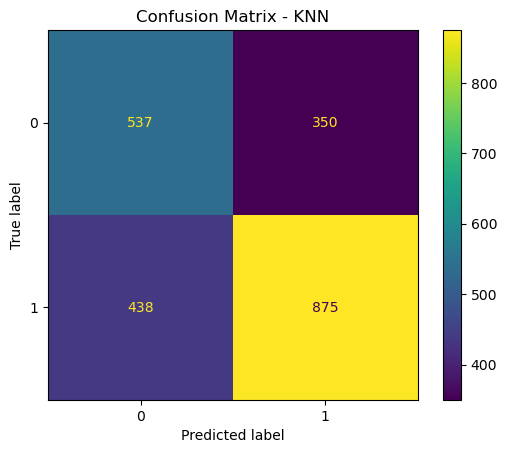

In [18]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

trained = {}
scores = {}
for name, mdl in models.items():
    pipe, acc = train_and_evaluate(mdl, name)
    trained[name] = pipe
    scores[name] = acc

In [19]:
# Summary of accuracies
print("\nModel accuracies:")
for name, sc in scores.items():
    print(f"{name}: {sc:.4f}")


Model accuracies:
Logistic Regression: 0.6559
Decision Tree: 0.6436
Random Forest: 0.6600
KNN: 0.6418


In [20]:
# Feature importance for tree-based models
def get_feature_names_after_preprocessing(preprocessor):
    # Get numeric feature names
    num_cols = num_features
    # Get categorical feature names after one-hot
    cat_cols = []
    if 'cat' in preprocessor.named_transformers_ and hasattr(preprocessor.named_transformers_['cat'].named_steps['onehot'], 'get_feature_names_out'):
        cat_cols = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features))
    return num_cols + cat_cols



Top 15 feature importances from Random Forest:


,feature,importance
0,ID,0.265781
6,Weight_in_gms,0.168404
5,Discount_offered,0.157751
3,Cost_of_the_Product,0.124509
4,Prior_purchases,0.048899
2,Customer_rating,0.048489
1,Customer_care_calls,0.046720
11,Warehouse_block_F,0.013401
19,Gender_M,0.011850
14,Mode_of_Shipment_Ship,0.011677


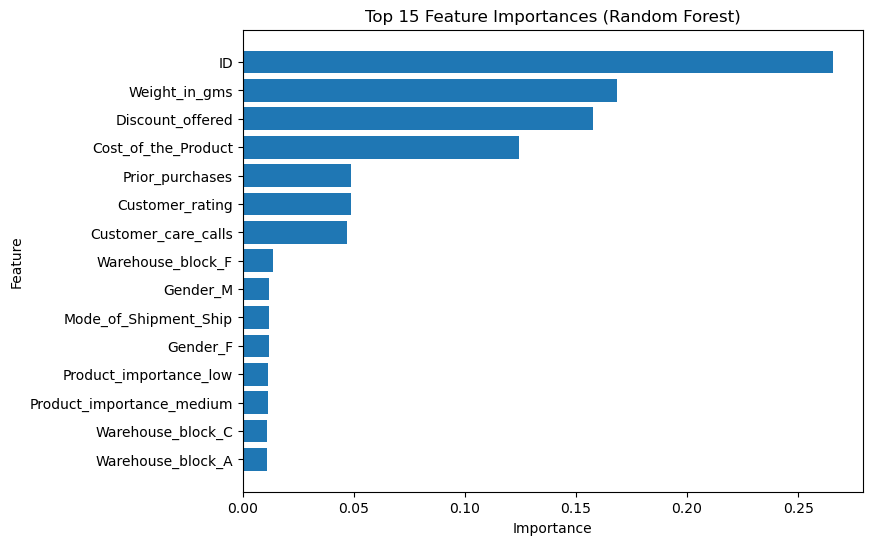

In [21]:
# Use Random Forest model to get feature importances
rf_pipe = trained.get("Random Forest")
if rf_pipe is not None:
    rf_clf = rf_pipe.named_steps['classifier']
    # Fit preprocessor on entire X to extract correct feature names
    preprocessor.fit(X)
    feat_names = get_feature_names_after_preprocessing(preprocessor)
    importances = rf_clf.feature_importances_
    # Align lengths (sometimes feature numbers can differ if new categories)
    if len(importances) == len(feat_names):
        feat_imp = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values(by='importance', ascending=False)
        print("\nTop 15 feature importances from Random Forest:")
        display(feat_imp.head(15))
        plt.figure(figsize=(8,6))
        plt.barh(feat_imp['feature'].head(15)[::-1], feat_imp['importance'].head(15)[::-1])
        plt.title('Top 15 Feature Importances (Random Forest)')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print("\nCould not align feature importances with feature names (different lengths).")


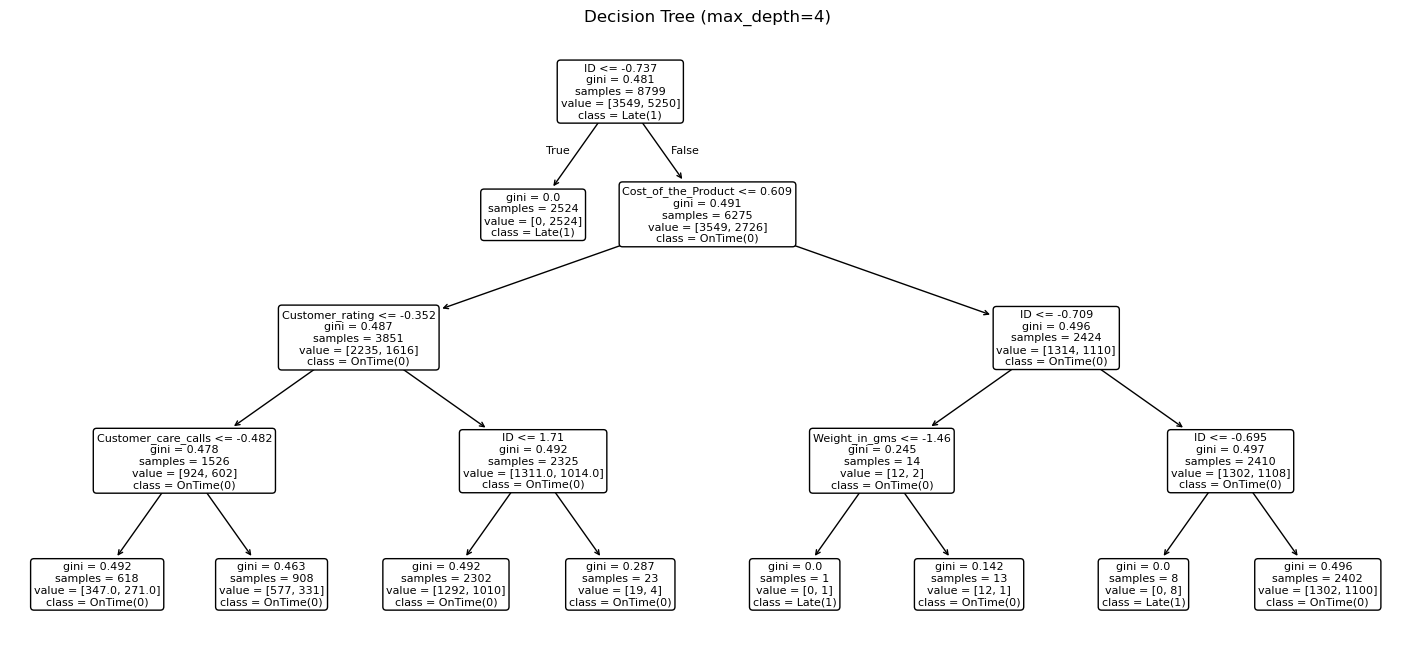

In [22]:
# Decision tree visualization (fit on small depth for clarity)
dt_pipe = trained.get("Decision Tree")
if dt_pipe is not None:
    # Refit a small decision tree for visualization purposes
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # Preprocess numeric and categorical into array for plotting tree feature names
    preprocessor.fit(X_train_full)
    X_train_trans = preprocessor.transform(X_train_full)
    feat_names = get_feature_names_after_preprocessing(preprocessor)
    small_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
    small_tree.fit(X_train_trans, y_train_full)
    plt.figure(figsize=(18,8))
    plot_tree(small_tree, feature_names=feat_names, class_names=['OnTime(0)','Late(1)'], filled=False, rounded=True, fontsize=8)
    plt.title('Decision Tree (max_depth=4)')
    plt.show()


In [23]:
# Cross validation scores for best models
print("\nCross-validation scores (5-fold):")
for name, mdl in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', mdl)])
    scores_cv = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
    print(f"{name}: mean={scores_cv.mean():.4f}, std={scores_cv.std():.4f}")




Cross-validation scores (5-fold):
Logistic Regression: mean=0.5487, std=0.0907
Decision Tree: mean=0.3428, std=0.2457
Random Forest: mean=0.3617, std=0.2305
KNN: mean=0.5397, std=0.1515


In [28]:
import os
import joblib

# Create a local folder called "models" if it doesn’t exist
os.makedirs("models", exist_ok=True)

# Save trained models
for name, pipe in trained.items():
    fname = f"models/{name.replace(' ', '_')}_pipeline.joblib"
    joblib.dump(pipe, fname)
    print(f"✅ Saved {name} pipeline to {fname}")

print("\nAll done. Models trained and saved locally in 'models/' folder.")


✅ Saved Logistic Regression pipeline to models/Logistic_Regression_pipeline.joblib
✅ Saved Decision Tree pipeline to models/Decision_Tree_pipeline.joblib
✅ Saved Random Forest pipeline to models/Random_Forest_pipeline.joblib
✅ Saved KNN pipeline to models/KNN_pipeline.joblib

All done. Models trained and saved locally in 'models/' folder.


In [36]:
###additional

In [30]:

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=["Reached.on.Time_Y.N"])
y = df["Reached.on.Time_Y.N"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split completed")
print("Train size:", X_train.shape, "Test size:", X_test.shape)


✅ Data split completed
Train size: (8799, 11) Test size: (2200, 11)


In [32]:
rf = trained["Random Forest"]

# Access feature importances
importances = rf.named_steps["classifier"].feature_importances_

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Sort by importance
sorted_idx = importances.argsort()[::-1]

# Print top 10 important features
for i in sorted_idx[:10]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


num__ID: 0.2658
num__Weight_in_gms: 0.1684
num__Discount_offered: 0.1578
num__Cost_of_the_Product: 0.1245
num__Prior_purchases: 0.0489
num__Customer_rating: 0.0485
num__Customer_care_calls: 0.0467
cat__Warehouse_block_F: 0.0134
cat__Gender_M: 0.0118
cat__Mode_of_Shipment_Ship: 0.0117


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    Pipeline([("preprocessor", preprocessor), ("model", RandomForestClassifier(random_state=42))]),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best score: 0.6843050410162274


In [34]:
import joblib
loaded_model = joblib.load("models/Random_Forest_pipeline.joblib")
sample = X_test.iloc[[0]]
print("Prediction:", loaded_model.predict(sample))


Prediction: [1]
